Using Velocity and Cellrank with Streams
========================================

In [1]:
import scvelo as scv
import scanpy as sc
import cellrank as cr
import numpy as np
import mira
from IPython.display import display, Image

scv.settings.verbosity = 3
#scv.settings.set_figure_params("scvelo")
cr.settings.verbosity = 2

import warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)

In [2]:
adata = scv.datasets.pancreas()

scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)

Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


recovering dynamics (using 8/12 cores)


  0%|          | 0/1295 [00:00<?, ?gene/s]

    finished (0:02:21) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:08) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


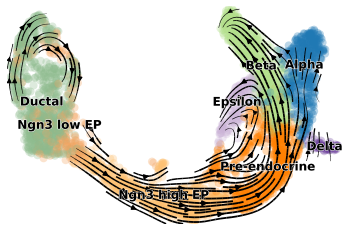

In [3]:
scv.tl.recover_dynamics(adata, n_jobs=8)

scv.tl.velocity(adata, mode="dynamical")
scv.tl.velocity_graph(adata)

scv.pl.velocity_embedding_stream(
    adata, basis="umap", legend_fontsize=12, title="", smooth=0.8, min_mass=4
)

Computing transition matrix based on logits using `'deterministic'` mode


/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `cellrank.tl.terminal_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  
/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/cellrank/tl/_init_term_states.py:161: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  **kwargs,


Estimating `softmax_scale` using `'deterministic'` mode


  0%|          | 0/3696 [00:00<?, ?cell/s]

Setting `softmax_scale=5.3689`


  0%|          | 0/3696 [00:00<?, ?cell/s]

    Finish (0:00:05)
Using a connectivity kernel with weight `0.4`
Computing transition matrix based on `adata.obsp['connectivities']`
    Finish (0:00:00)
Computing Schur decomposition
Mat Object: 1 MPI processes
  type: seqdense
1.0000000000000142e+00 5.3803756481578327e-03 -1.2794685394198833e-02 -9.5131219606562015e-03 -2.2339225964373214e-02 
0.0000000000000000e+00 9.9202651236455486e-01 -1.0646472366574525e-02 -2.5354284353761324e-02 -3.8328503608907822e-03 
0.0000000000000000e+00 0.0000000000000000e+00 9.8813594109072822e-01 -8.0455122123365055e-03 -5.0518164055343897e-03 
0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 9.5964508082888633e-01 1.2103228607740690e-02 
0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 9.4911847117042514e-01 
Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Computing `5` macrostates


INFO:root:Using pre-computed Schur decomposition


Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Adding `adata.obs['terminal_states']`
       `adata.obs['terminal_states_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


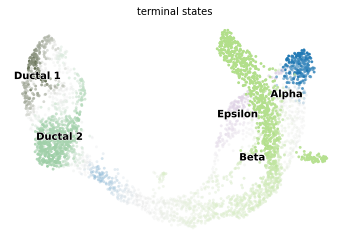

In [4]:
cr.tl.terminal_states(adata, cluster_key="clusters", weight_connectivities=0.4,
                     n_states=5, force_recompute=True)
cr.pl.terminal_states(adata)

Accessing `adata.obsp['T_bwd']`
Computing transition matrix based on logits using `'deterministic'` mode


/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.initial_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.
/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/cellrank/tl/_init_term_states.py:161: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  **kwargs,


Estimating `softmax_scale` using `'deterministic'` mode


  0%|          | 0/3696 [00:00<?, ?cell/s]

Setting `softmax_scale=5.3689`


  0%|          | 0/3696 [00:00<?, ?cell/s]

    Finish (0:00:09)
Using a connectivity kernel with weight `0.2`
Computing transition matrix based on `adata.obsp['connectivities']`
    Finish (0:00:00)
Computing eigendecomposition of the transition matrix
Adding `adata.uns['eigendecomposition_bwd']`
       `.eigendecomposition`
    Finish (0:00:00)
For 1 macrostate, stationary distribution is computed
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Adding `adata.obs['initial_states']`
       `adata.obs['initial_states_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


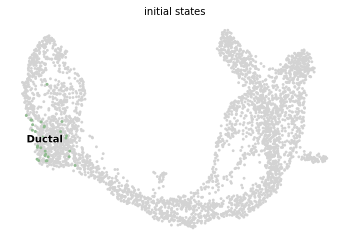

In [5]:
cr.tl.initial_states(adata, cluster_key="clusters")
cr.pl.initial_states(adata, discrete=True)

Computing transition matrix based on logits using `'deterministic'` mode


/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


Estimating `softmax_scale` using `'deterministic'` mode


  0%|          | 0/3696 [00:00<?, ?cell/s]

[0]PETSC ERROR: 

Setting `softmax_scale=5.3689`


  0%|          | 0/3696 [00:00<?, ?cell/s]

[0]PETSC ERROR: 

    Finish (0:00:05)
Using a connectivity kernel with weight `0.5`
Computing transition matrix based on `adata.obsp['connectivities']`
    Finish (0:00:00)
Computing absorption probabilities


/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `cellrank.tl.lineages` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  


  0%|          | 0/5 [00:00<?, ?/s]

[0]PETSC ERROR: 

Adding `adata.obsm['to_terminal_states']`
       `.absorption_probabilities`
    Finish (0:00:00)


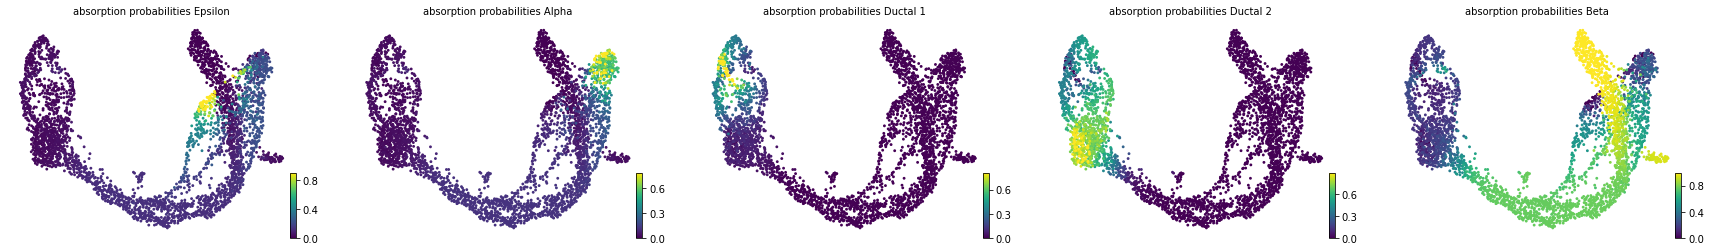

In [6]:
cr.tl.transition_matrix(adata, weight_connectivities=0.5)
cr.tl.lineages(adata)
cr.pl.lineages(adata, same_plot=False)

In [7]:
scv.tl.velocity_pseudotime(adata)

computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


INFO:mira.adata_interface.pseudotime:Added key to obs: tree_states
INFO:mira.adata_interface.pseudotime:Added key to uns: tree_state_names
INFO:mira.adata_interface.pseudotime:Added key to uns: connectivities_tree
... storing 'tree_states' as categorical


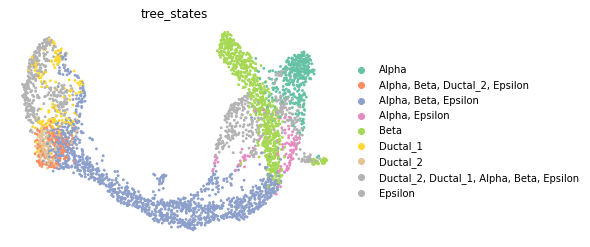

In [8]:
mira.time.get_tree_structure(adata, threshold = 0.8, start_cell = int(adata.obs.initial_states_probs.argmax()),
            pseudotime_key = 'velocity_pseudotime', cellrank = True)
sc.pl.umap(adata, color = 'tree_states', palette = 'Set2', frameon = False)

(<Figure size 504x288 with 1 Axes>, <AxesSubplot:>)

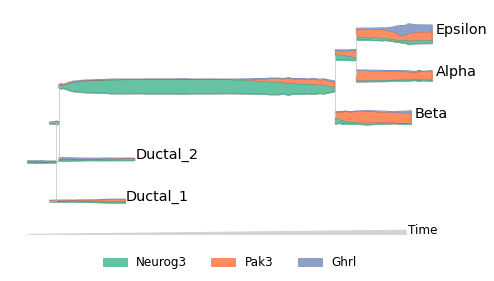

In [9]:
mira.pl.plot_stream(adata, pseudotime_key='velocity_pseudotime',
                   data = ['Pak3','Neurog3','Ghrl'], log_pseudotime=False, palette = 'Set2',
                   scale_features=True, figsize=(7,4), max_bar_height=0.99, clip = 1, min_pseudotime = 0.2)

(<Figure size 504x288 with 1 Axes>, <AxesSubplot:>)

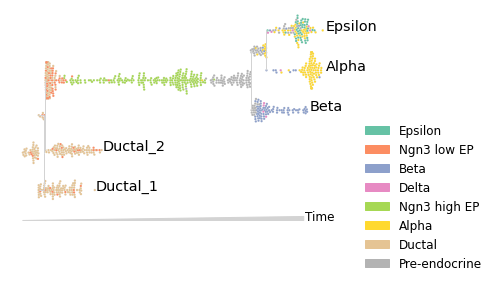

In [10]:
adata.obs.clusters = adata.obs.clusters.astype(str)
mira.pl.plot_stream(adata, pseudotime_key='velocity_pseudotime', style = 'swarm', max_swarm_density=500,
                   data = 'clusters', log_pseudotime=False, palette = 'Set2', size = 5, max_bar_height=0.9,
                   scale_features=True, figsize=(7,4), min_pseudotime = 0.2, linecolor = 'lightgrey')

(<Figure size 504x288 with 1 Axes>, <AxesSubplot:>)

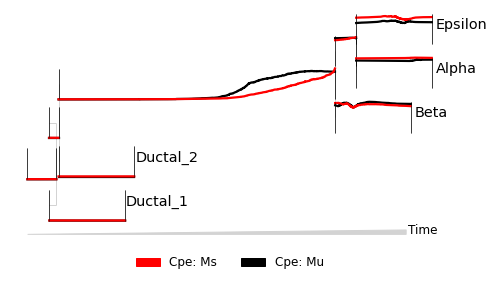

In [11]:
mira.pl.plot_stream(adata, pseudotime_key='velocity_pseudotime', layers=['Ms','Mu'], style = 'line', size = 5,
                   data = ['Cpe','Cpe'], log_pseudotime=False, palette = ['red','black'], window_size=101,
                   scale_features=True, figsize=(7,4), max_bar_height=0.7, clip = 1, min_pseudotime = 0.2)

In [12]:
cr.tl.transition_matrix(adata, weight_connectivities=0)

Computing transition matrix based on logits using `'deterministic'` mode


/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


Estimating `softmax_scale` using `'deterministic'` mode


  0%|          | 0/3696 [00:00<?, ?cell/s]

[0]PETSC ERROR: 

Setting `softmax_scale=5.3689`


  0%|          | 0/3696 [00:00<?, ?cell/s]

[0]PETSC ERROR: 

    Finish (0:00:05)


<VelocityKernel>

INFO:mira.pseudotime.backtrace:Creating transport map ...
INFO:mira.pseudotime.backtrace:Tracing ancestral populations ...


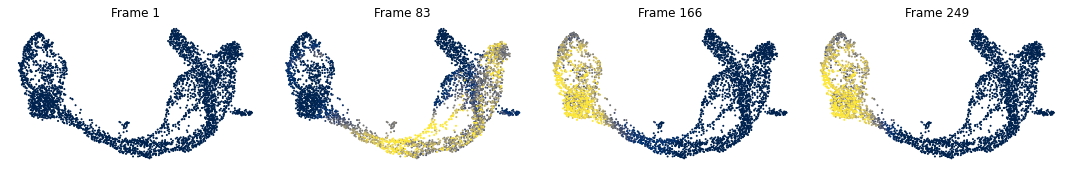

INFO:mira.pseudotime.backtrace:Creating animation ...
INFO:mira.pseudotime.backtrace:Saving animation ...
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


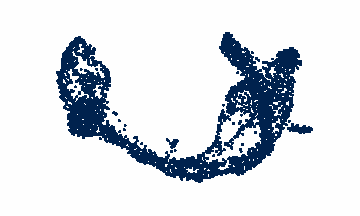

In [13]:
mira.time.trace_differentiation(adata, start_cells= (adata.obs.terminal_states == 'Alpha').values,
                               direction='forward', transport_map_key='T_bwd', save_name='data/velocity_test.gif',
                               log_prob = True, num_steps=250, steps_per_frame=1, sqrt_time=True, palette='cividis',
                               vmax_quantile=0.95, figsize = (5,3), size = 1, fps=24, add_outline = False,
                               num_preview_frames=3)

with open('data/velocity_test.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

INFO:mira.pseudotime.backtrace:Creating transport map ...
INFO:mira.pseudotime.backtrace:Tracing ancestral populations ...


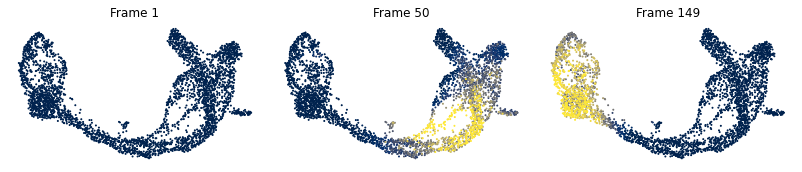

INFO:mira.pseudotime.backtrace:Creating animation ...
INFO:mira.pseudotime.backtrace:Saving animation ...
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


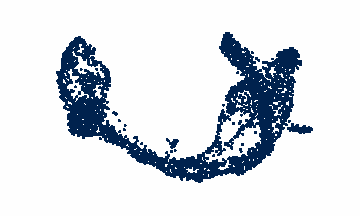

In [14]:
mira.time.trace_differentiation(adata, start_cells= (adata.obs.terminal_states == 'Beta').values,
                               direction='forward', transport_map_key='T_bwd', save_name='data/velocity_test.gif',
                               log_prob = True, num_steps=150, steps_per_frame=1, sqrt_time=True, palette='cividis',
                               vmax_quantile=0.95, figsize = (5,3), size = 1, fps=24, add_outline = False,
                               num_preview_frames=3)

with open('data/velocity_test.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

INFO:mira.pseudotime.backtrace:Creating transport map ...
INFO:mira.pseudotime.backtrace:Tracing ancestral populations ...


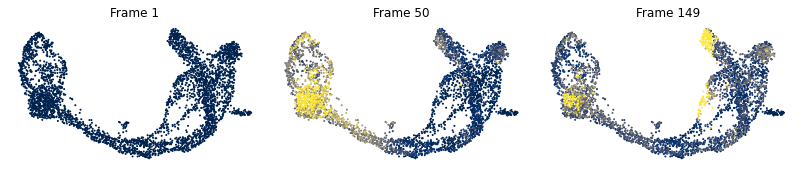

INFO:mira.pseudotime.backtrace:Creating animation ...
INFO:mira.pseudotime.backtrace:Saving animation ...
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


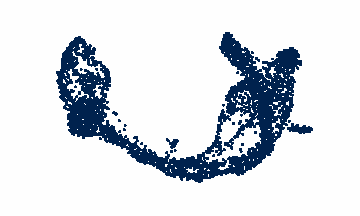

In [15]:
mira.time.trace_differentiation(adata, start_cells= [int(adata.obs.initial_states_probs.argmax())],
                               transport_map_key='T_fwd', save_name='data/velocity_test.gif',
                               log_prob = True, num_steps=150, steps_per_frame=1, sqrt_time=True, palette='cividis',
                               vmax_quantile=0.95, figsize = (5,3), size = 1, fps=24, add_outline = False,
                               num_preview_frames=3)

with open('data/velocity_test.gif','rb') as f:
    display(Image(data=f.read(), format='png'))